In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Data:
 y = 0.8 X^2 + 0.9 X + 2

In [3]:

x = 6* np.random.rand(200,1) -3
y = 0.8 * x**2 + 0.9 *x +  2 + np.random.randn(200,1)


Text(0, 0.5, 'y')

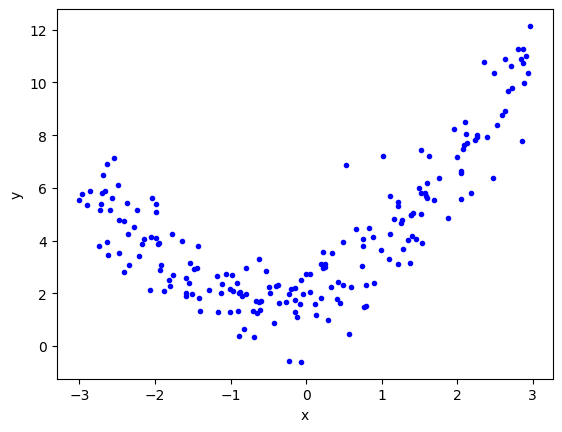

In [4]:
#visualize it:
plt.plot(x,y, "b.")
plt.xlabel("x")
plt.ylabel("y")

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 2)

# Linear Regression:

In [6]:
linear_model = LinearRegression()  # creating model
linear_model.fit(x_train, y_train) # fit the model
y_pred = linear_model.predict(x_test)
r2_score(y_test, y_pred) # Evaluate the model


0.30467497872861715

Text(0, 0.5, 'y')

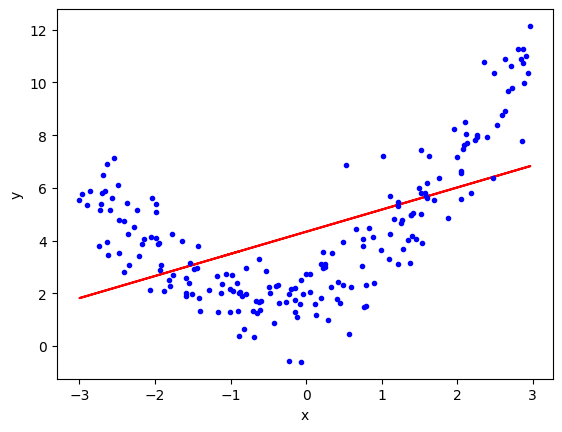

In [7]:
plt.plot(x_train, linear_model.predict(x_train), color = "r")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")

so bad performance, it's not representitave

# Polynomial Regression:

In [8]:
# apply it with degree 2
poly = PolynomialFeatures(degree=2, include_bias= True)

# Feature Transformation
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)


# train the polynomial regression
poly_model = LinearRegression()
poly_model.fit(x_train_trans, y_train) #fit the model
y_pred = poly_model.predict(x_test_trans)
r2_score(y_test, y_pred) # Evaluate



0.831543393450786

Text(0.5, 1.0, 'Polynomial Fitting')

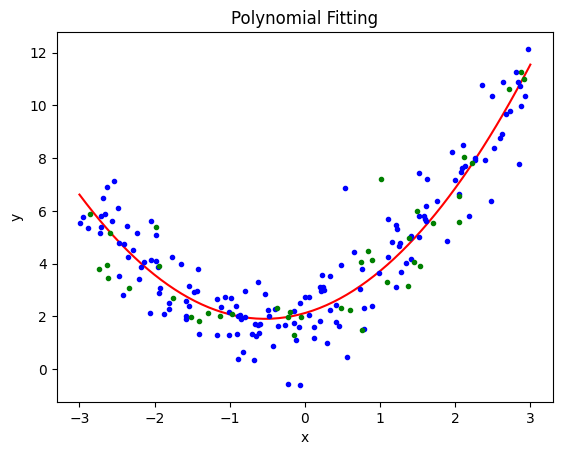

In [9]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = poly_model.predict(x_new_poly)

#visualize it
plt.plot(x_new, y_new, "r-", label = "predictions")
plt.plot(x_train, y_train, "b.", label = "Training points")
plt.plot(x_test, y_test, "g.",  label = "Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Fitting")

# Different degrees:

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    print(r2_score(y_test, y_pred))

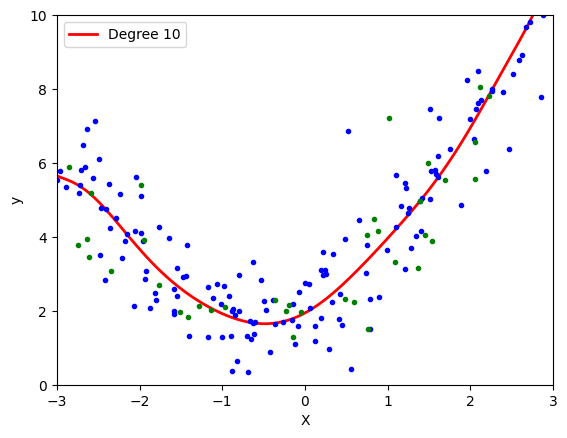

0.831543393450786


In [11]:
polynomial_regression(10)
